# Ramsey King
# DSC 680 - Applied Data Science
# April 9 - 2022

###  This Jupyter file will perform the analysis for the author classification project.

In [1]:
# Load the author and speech text dataset, and necessary libraries to use.
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('talk_corpus.csv', index_col=0)
df.sample(30)

,speaker,talks
22,gordon b hinckley,The text for this speech is unavailable. Pleas...
63,russell m nelson,"Thank you, President Robert L. Millet, for you..."
491,dallin h oaks,"My dear brothers and sisters, I rejoice with y..."
387,thomas s monson,A few weeks ago at a fast and testimony meetin...
114,henry b eyring,You Are All TeachersI am grateful to have been...
286,gordon b hinckley,"My dear brethren, it is a tremendous honor and..."
116,neal a maxwell,The text for this speech is unavailable. Pleas...
79,russell m nelson,"Dear brothers and sisters, I join my brethren ..."
465,dallin h oaks,"The book of Job poses the universal question, ..."
547,henry b eyring,I am grateful to be with you in this conferenc...


In [2]:
# some data prep and cleaning is in order before getting to the analysis.
df.shape

(794, 2)

In [3]:
# removes talks that do not contain any speech information
df = df[df['talks'].str.contains('for this speech is unavailable')==False]
df.shape


(757, 2)

In [4]:
# In running the above code, realized that there is a speaker entitled "jeffery r and patricia t holland..." that needs to be
# assigned to jeffery r holland
df['speaker'] = df['speaker'].replace({'jeffrey r and patricia t holland_things learned together': 'jeffrey r holland'})
df['speaker'].value_counts()


gordon b hinckley    127
henry b eyring       123
russell m nelson     120
dallin h oaks        117
thomas s monson      109
jeffrey r holland     85
neal a maxwell        76
Name: speaker, dtype: int64

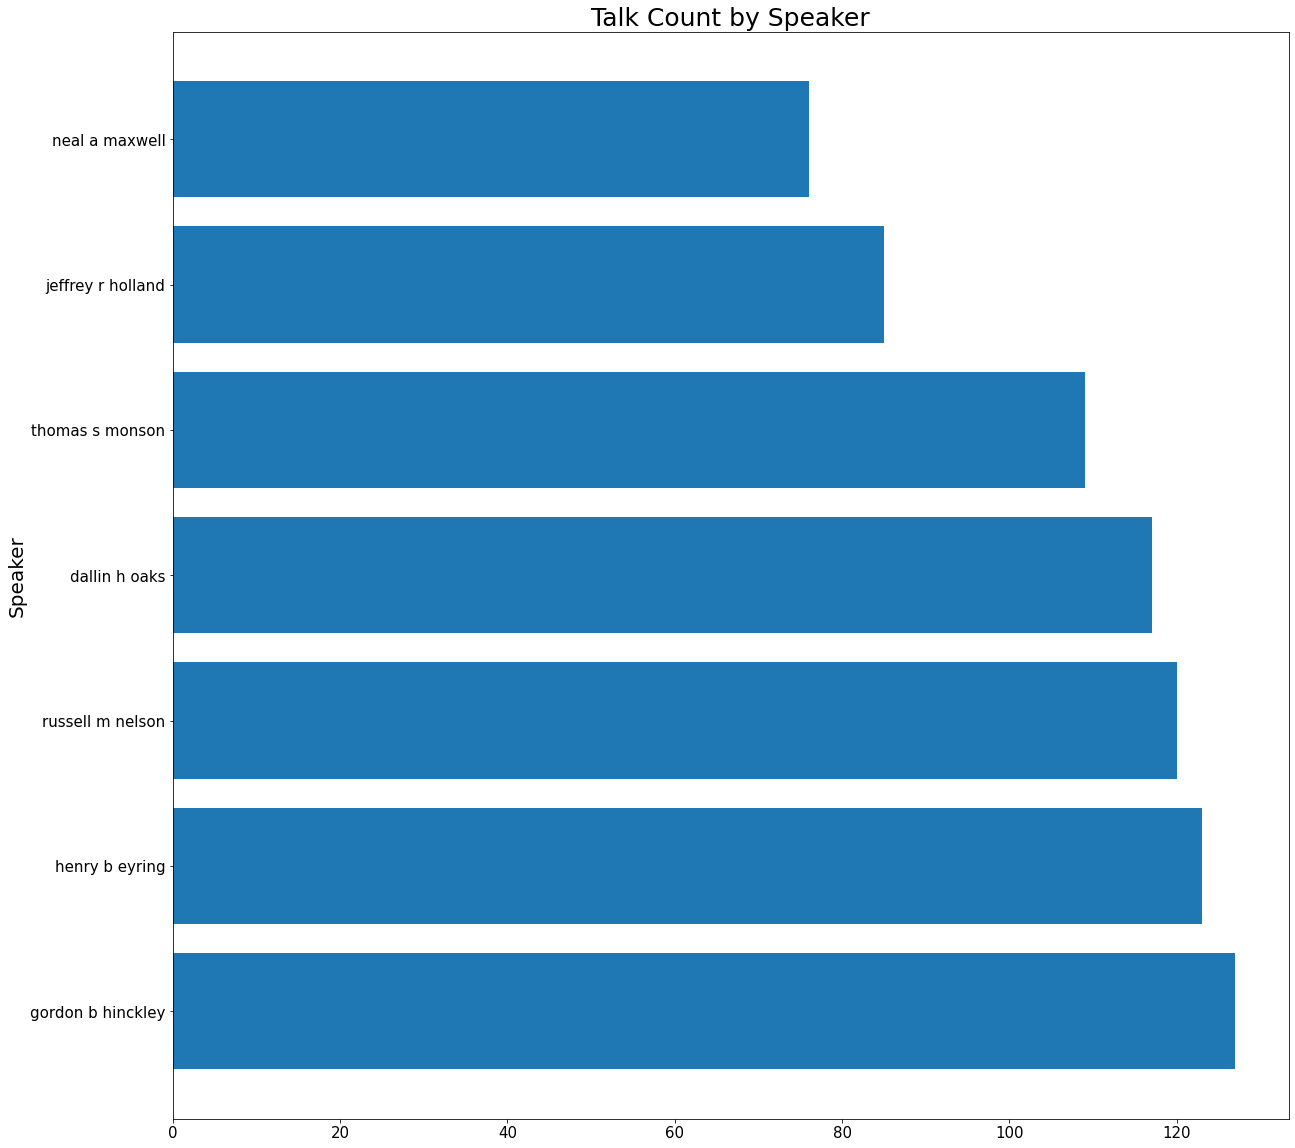

In [5]:
plt.rcParams['figure.figsize'] = (20,20)

# make subplots
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.barh(df['speaker'].value_counts().index, df['speaker'].value_counts())
axes.set_title('Talk Count by Speaker', fontsize=25)
axes.set_ylabel('Speaker', fontsize=20)
axes.tick_params(axis='both', labelsize=15)

plt.show()


In [6]:
# text processing can begin now.  Punctuation removal, lemmatisation, stop word removal will all take place here.

# Lowercase text
df['talks'] = df['talks'].apply(lambda x: x.lower())

In [7]:
# punctuation removal
df['talks'] = df['talks'].str.replace(r'[^\w\s]+', '', regex=True)
df.sample(15)

,speaker,talks
203,jeffrey r holland,we are drawing to the close of another magnifi...
434,dallin h oaks,in mortality we have the certainty of death an...
118,jeffrey r holland,i am honored and privileged to be invited to a...
154,thomas s monson,you are a glorious group even a chosen generat...
159,jeffrey r holland,this responsibility to speak to you never gets...
242,gordon b hinckley,my dear young friends you beautiful young wome...
497,dallin h oaks,my dear brothers and sisters because it was no...
596,henry b eyring,because the lord is kind he calls servants to ...
23,neal a maxwell,i welcome you to a christian campus where disc...
461,dallin h oaks,some years ago i enjoyed a newspaper cartoon t...


In [8]:
# tokenization of the speeches into sentences.
import nltk
# nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df['sentence_tokenize'] = df['talks'].apply(lambda x: sent_tokenize(x))

In [9]:
# tokenization of the speeches into words
from nltk.tokenize import word_tokenize
df['word_tokenize'] = df['talks'].apply(lambda x: word_tokenize(x))

In [10]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
data = []

for i in range(df.shape[0]):
    text = df.iloc[i,3]
    talk_processed_list = []
    for word in text:
        if word not in set(stopwords.words('english')):
            talk_processed_list.append(stemmer.stem(word))
    proc_talk = " ".join(talk_processed_list)
    data.append(proc_talk)

# print(data[1], len(data))

In [11]:
# pos
import nltk
# nltk.download('averaged_perceptron_tagger')

df['word_pos'] = df['word_tokenize'].apply(lambda x: nltk.pos_tag(x))

In [12]:
# adapted from CharlesRajendran TextClassification github

# creating the feature matrix
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(data).toarray()
y = df.iloc[:, 0]
print(X.shape, y)

(757, 1000) 2         henry b eyring
4         neal a maxwell
7      gordon b hinckley
8      gordon b hinckley
10         dallin h oaks
             ...        
594       henry b eyring
595       henry b eyring
596       henry b eyring
597       henry b eyring
598       henry b eyring
Name: speaker, Length: 757, dtype: object


In [13]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7)

In [14]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
# predict class
y_pred = classifier.predict(X_test)

In [16]:
# Confusion matrix, classification report, accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# print(cm)
print()
print(cr)
print()
print(accuracy)


                   precision    recall  f1-score   support

    dallin h oaks       0.72      0.70      0.71        33
gordon b hinckley       0.64      0.72      0.68        25
   henry b eyring       0.86      0.67      0.75        36
jeffrey r holland       0.59      0.62      0.60        21
   neal a maxwell       0.96      0.85      0.90        27
 russell m nelson       0.61      0.61      0.61        23
  thomas s monson       0.52      0.68      0.59        25

         accuracy                           0.69       190
        macro avg       0.70      0.69      0.69       190
     weighted avg       0.71      0.69      0.70       190


0.6947368421052632


In [17]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# print(cm)
print()
print(cr)
print()
print(accuracy)


                   precision    recall  f1-score   support

    dallin h oaks       0.88      0.85      0.86        33
gordon b hinckley       1.00      1.00      1.00        25
   henry b eyring       0.92      0.92      0.92        36
jeffrey r holland       0.90      0.90      0.90        21
   neal a maxwell       1.00      0.96      0.98        27
 russell m nelson       0.71      0.87      0.78        23
  thomas s monson       0.86      0.76      0.81        25

         accuracy                           0.89       190
        macro avg       0.90      0.89      0.89       190
     weighted avg       0.90      0.89      0.90       190


0.8947368421052632


henry b eyring


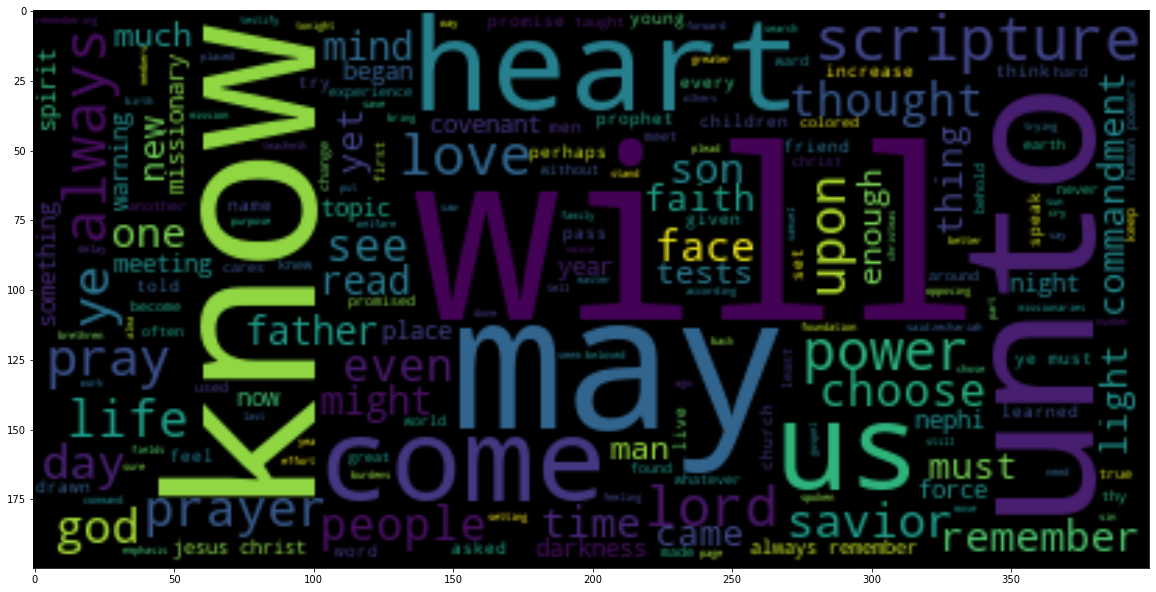

neal a maxwell


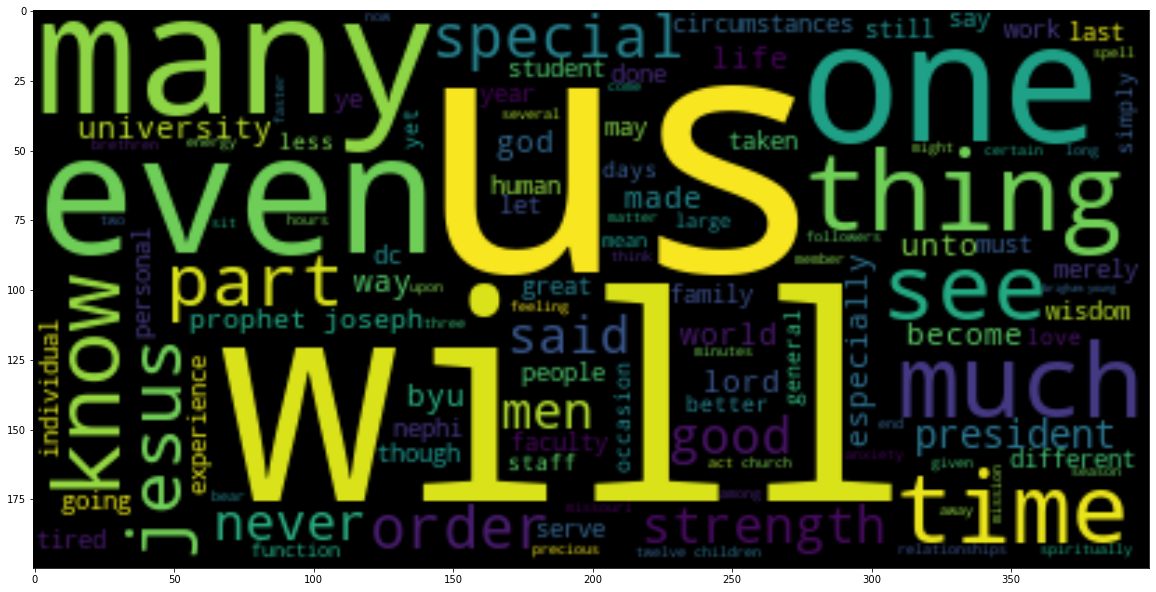

gordon b hinckley


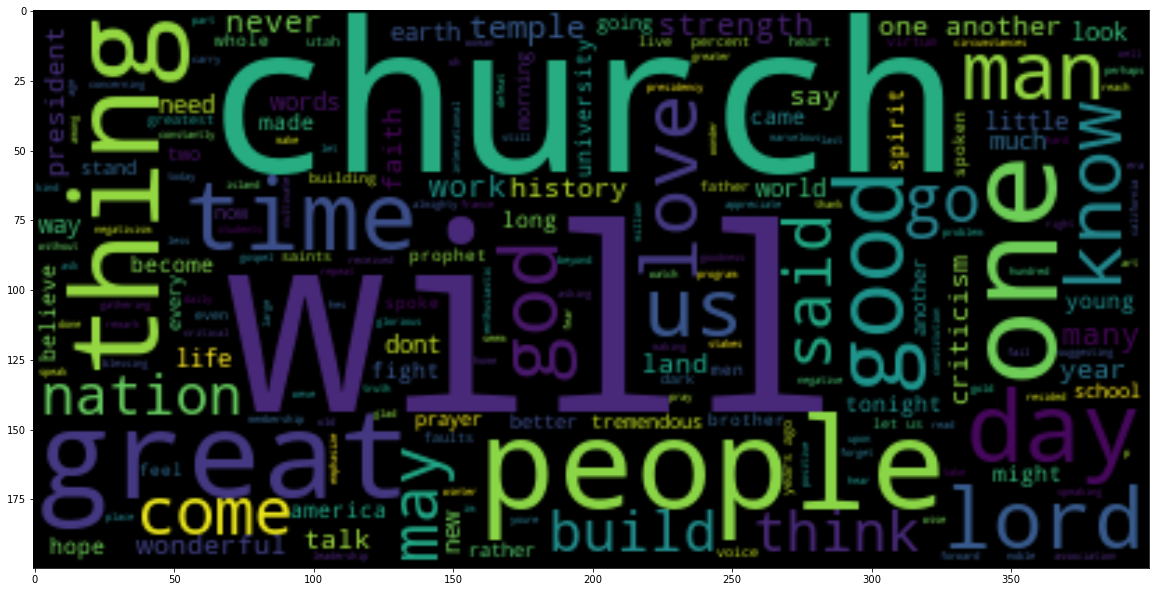

gordon b hinckley


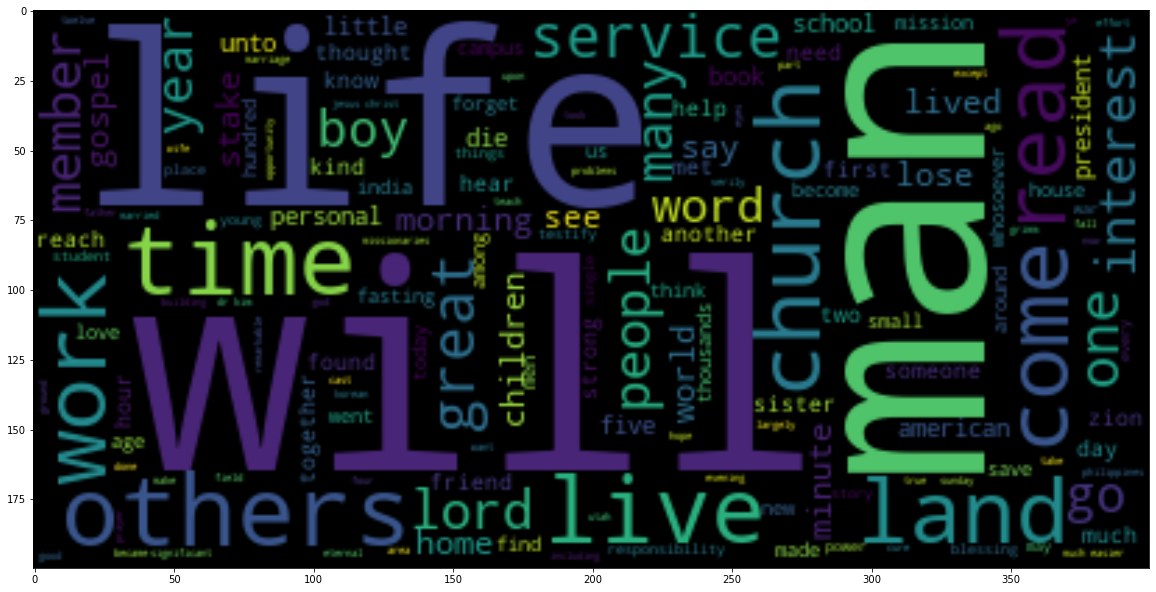

dallin h oaks


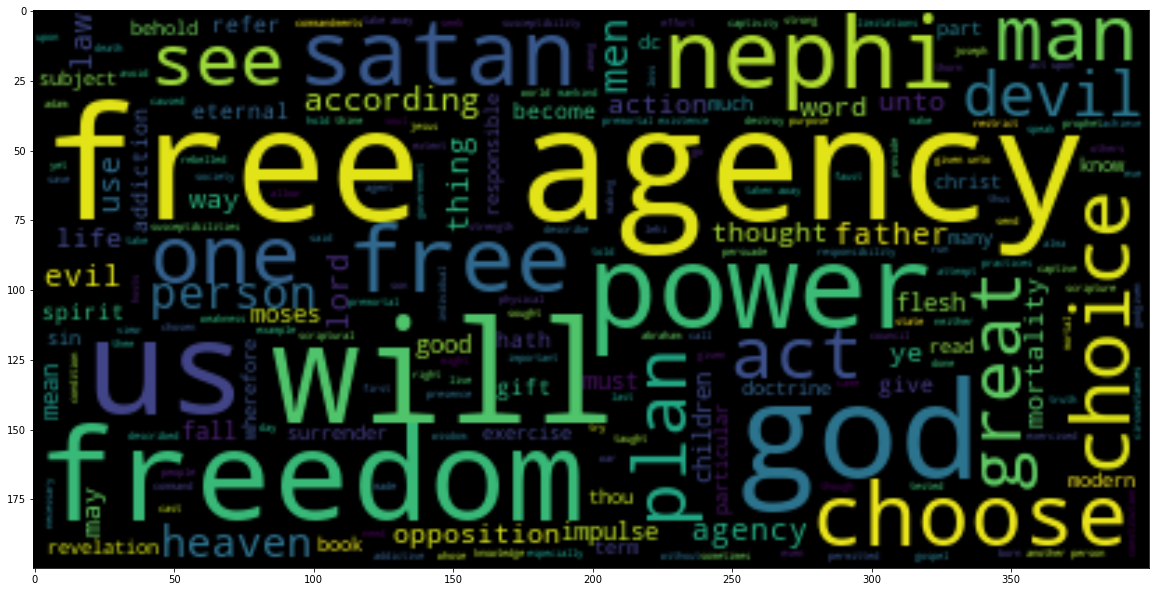

neal a maxwell


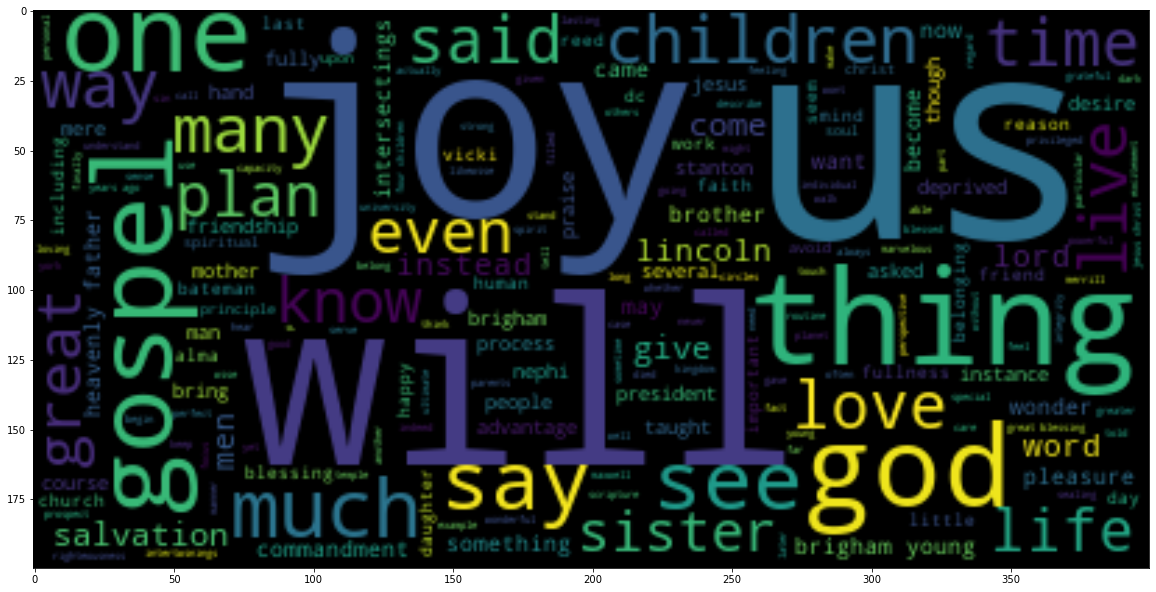

dallin h oaks


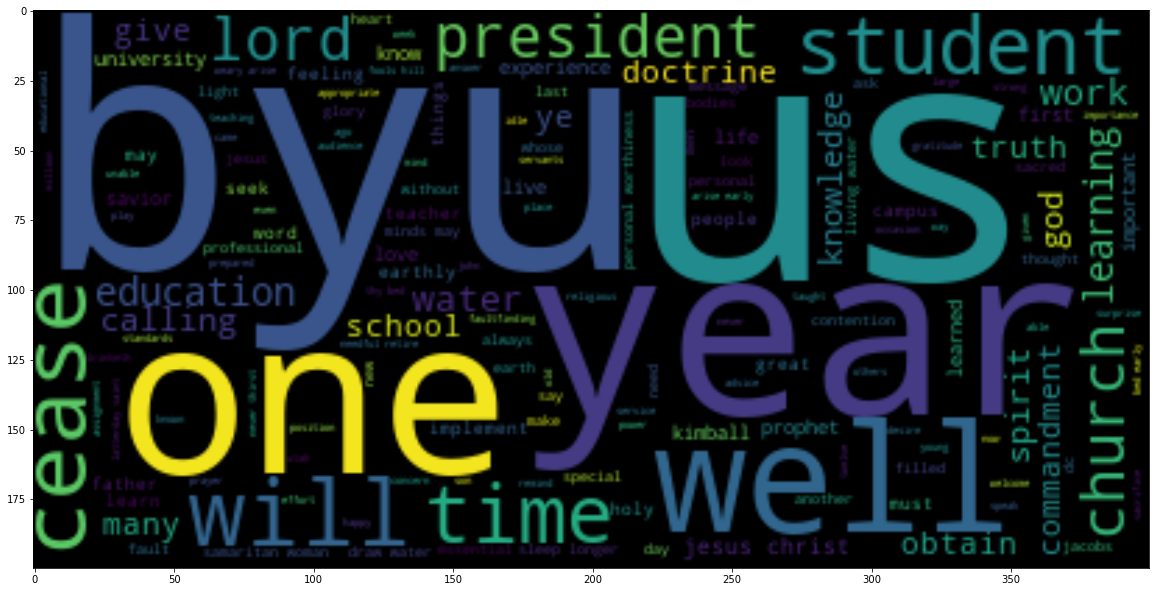

In [18]:
a = df['talks'].reset_index(drop=True)
b = df['speaker'].reset_index(drop=True)

wordcloud1 = WordCloud().generate(a[0])
wordcloud2 = WordCloud().generate(a[1])
wordcloud3 = WordCloud().generate(a[2])
wordcloud4 = WordCloud().generate(a[3])
wordcloud5 = WordCloud().generate(a[4])
wordcloud6 = WordCloud().generate(a[5])
wordcloud7 = WordCloud().generate(a[6])
# print(a[0])
print(b[0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
# print(a[1])
print(b[1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
# print(a[3])
print(b[2])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()
print(b[3])
plt.imshow(wordcloud4, interpolation='bilinear')
plt.show()
print(b[4])
plt.imshow(wordcloud5, interpolation='bilinear')
plt.show()
print(b[5])
plt.imshow(wordcloud6, interpolation='bilinear')
plt.show()
print(b[6])
plt.imshow(wordcloud7, interpolation='bilinear')
plt.show()

                   precision    recall  f1-score   support

    dallin h oaks       0.88      0.85      0.86        33
gordon b hinckley       1.00      1.00      1.00        25
   henry b eyring       0.92      0.92      0.92        36
jeffrey r holland       0.90      0.90      0.90        21
   neal a maxwell       1.00      0.96      0.98        27
 russell m nelson       0.71      0.87      0.78        23
  thomas s monson       0.86      0.76      0.81        25

         accuracy                           0.89       190
        macro avg       0.90      0.89      0.89       190
     weighted avg       0.90      0.89      0.90       190


0.8947368421052632


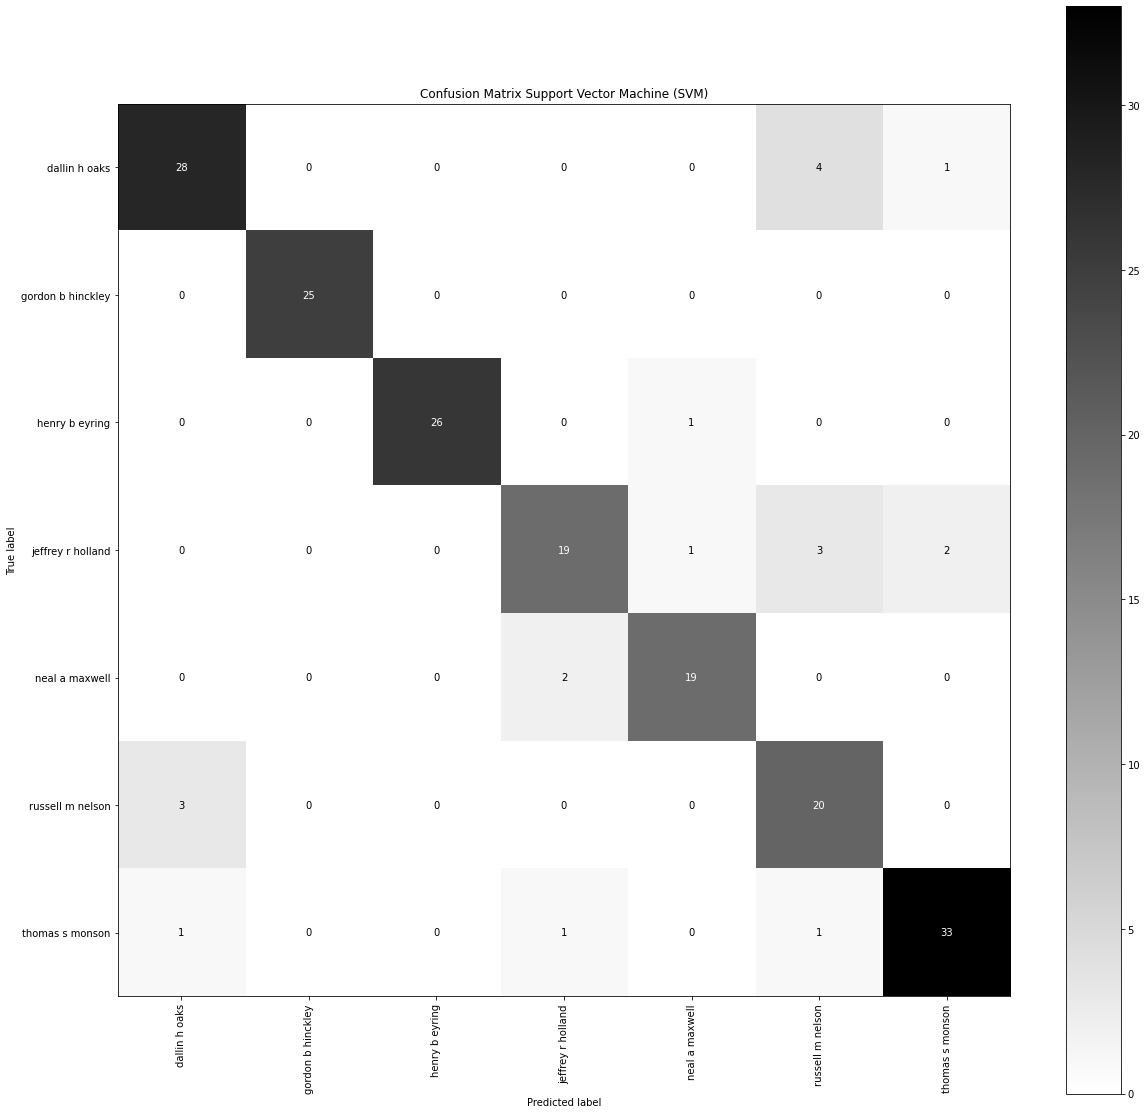

In [19]:
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay

svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['dallin h oaks', 'gordon b hinckley', 'neal a maxwell', 'thomas s monson',
                                              'jeffrey r holland','russell m nelson', 'henry b eyring'])

'''cm = confusion_matrix(y_test, y_pred, labels=['dallin h oaks', 'gordon b hinckley', 'neal a maxwell', 'thomas s monson',
                                              'jeffrey r holland','russell m nelson', 'henry b eyring'])'''
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(cr)
print()
print(accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot(xticks_rotation='vertical', cmap=plt.cm.binary)
plt.title("Confusion Matrix Support Vector Machine (SVM)")
plt.rc('font', size= 16)
plt.show()